# NumPy

What is [numpy](https://numpy.org/)?

From docs:

It provides:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

The most important data structure in NumPy is `ndarray`, which has a fixed length and stores elements of the same type. It is often said that Python is slow, but this is only true when it comes to iterating over small Python objects. NumPy leverages fast implementations in C and FORTRAN to work with `ndarray` arrays.

[Based on the tutorial at UAB, Barcelona]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementation comparison

In [1]:
voltages = [10.1, 15.1, 9.5]
resistances = [1.2, 2.4, 5.2]

currents = [U * R for U, R in zip(voltages, resistances)]
currents

[12.12, 36.239999999999995, 49.4]

In [2]:
# list(zip(voltages, resistances))

In [6]:
U = np.array([10.1, 15.1, 9.5])
R = np.array([1.2, 2.4, 5.2])

I = U * R
I

array([12.12, 36.24, 49.4 ])

In [7]:
type(U)

numpy.ndarray

In [8]:
currents[1] == I[1]

True

### Finding closest point in array

In [9]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

point = (1, 2)
points = [(3, 2), (4, 2), (3, 0)]

min_distance = float('inf')
for other in points:
    distance = euclidean_distance(point, other)
    if distance < min_distance:
        closest = other
        min_distance = distance 

print(min_distance, closest)

2.0 (3, 2)


In [10]:
point = np.array([1, 2])
points = np.array([(3, 2), (4, 2), (3, 0)])

distance = np.linalg.norm(point - points, axis=1)
idx = np.argmin(distance)

print(distance[idx], points[idx])

2.0 [3 2]


### Time measurements

In [11]:
def mean(data):   
    n = 0
    total = 0.0
    
    if len(data) < 2:
        return float('nan')

    for value in data:
        n += 1
        total += value

    return total / n

In [12]:
%%timeit -n100

l = list(range(2000))  # list with elements with values from 0,...,1999
mean(l)

201 µs ± 5.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit -n100

a = np.arange(2000)  # array with numbers 0,...,1999

np.mean(a)

22.5 µs ± 8.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
import math

def var(data):
    '''
    Welford's algorithm for one-pass calculation of the variance
    Avoids rounding errors of large numbers when doing the naive
    approach of `sum(v**2 for v in data) - sum(v)**2`
    '''
    # https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Welford's_online_algorithm
    n = 0
    mean = 0.0
    m2 = 0.0
    
    if len(data) < 2:
        return float('nan')

    for value in data:
        n += 1
        delta = value - mean
        mean += delta / n
        delta2 = value - mean
        m2 += delta * delta2

    return m2 / n 

In [15]:
%%timeit -n100

l = list(range(2000))  # list with elements with values from 0,...,1999
var(l)

558 µs ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit -n100

a = np.arange(2000)  # array with numbers 0,...,1999

np.var(a)

41.8 µs ± 8.81 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Vecorization of basic operations

In [17]:
# create a numpy array from a python list
a = np.array([1.0, 3.5, 7.1, 4, 6])
a

array([1. , 3.5, 7.1, 4. , 6. ])

In [18]:
a*a

array([ 1.  , 12.25, 50.41, 16.  , 36.  ])

In [19]:
a**2

array([ 1.  , 12.25, 50.41, 16.  , 36.  ])

In [20]:
a**a

array([1.00000000e+00, 8.02117802e+01, 1.10645633e+06, 2.56000000e+02,
       4.66560000e+04])

In [22]:
math.cos(a) # Will not work

TypeError: only size-1 arrays can be converted to Python scalars

In [23]:
np.cos(a)

array([ 0.54030231, -0.93645669,  0.68454667, -0.65364362,  0.96017029])

Pozdtawowe funkcje zaimplementowanie w pythonie zadziałają dzięki przeciążeniu.

In [24]:
def poly(x):
    return x + 2 * x**2 - x**3

poly(a)

array([   2.   ,  -14.875, -249.991,  -28.   , -138.   ])

In [25]:
poly(np.pi)

-8.125475224531307

### Useful attributes

In [26]:
len(a)

5

In [27]:
a.shape

(5,)

In [28]:
a.dtype

dtype('float64')

In [29]:
a.ndim

1

### 2D arrays

In [30]:
# two-dimensional array
y = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

y + y

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [31]:
## since python 3.5 @ is matrix product
y @ y

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [32]:
# Broadcasting, changing array dimensions to fit the larger one
# Description of numpy broadcating rules:
# https://numpy.org/doc/stable/user/basics.broadcasting.html
y + np.array([1, 2, 3])

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

In [33]:
10. + y 

array([[11., 12., 13.],
       [14., 15., 16.],
       [17., 18., 19.]])

### Various reduction operations

In [34]:
x = np.random.normal(0, 1, 10)

In [35]:
x

array([-0.65049621, -0.35863631, -0.02848224,  0.39944329,  1.38045479,
       -1.24498624, -0.29496817, -1.50253467, -1.03080887, -0.90100858])

In [36]:
np.sum(x)

-4.232023210814053

In [37]:
np.prod(x)

0.001877680937386445

In [38]:
np.mean(x)

-0.4232023210814053

Standard deviation of the population

In [39]:
np.std(x)

0.8121438105338097

Standard deviation of the mean

In [ ]:
np.std(x, ddof=1) / np.sqrt(len(x))

Standard deviation of the sample

In [ ]:
np.std(x, ddof=1)

Difference between adjacent elements

In [40]:
z = np.arange(10)**2
z

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [41]:
np.diff(z)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17])

### Reduction operations on multidimensional arrays

In [42]:
array2d = np.arange(20).reshape(4, 5)

array2d

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [43]:
np.sum(array2d, axis=0)

array([30, 34, 38, 42, 46])

In [44]:
np.mean(array2d, axis=1)

array([ 2.,  7., 12., 17.])

In [45]:
np.mean(array2d)

9.5

## Exercise 1

Write a function that calculates linear regression given input vectors x and y.

Reminder:

$$ f(x) = a \cdot x + b$$

z 

$$
\hat{a} = \frac{\mathrm{Cov}(x, y)}{\mathrm{Var}(x)} \\
\hat{b} = \bar{y} - \hat{a} \cdot \bar{x}
$$

In [46]:
def linear_regression(x,y):
  ## TODO: implement
  ## use np.cov and np.mea
  cov_matrix = np.cov(x, y)
  a = cov_matrix[0, 1] / cov_matrix[0, 0]
  b = np.mean(y) - a * np.mean(x)
  return a,b

In [47]:
x = np.linspace(0, 1, 50)
y = 5 * np.random.normal(x, 0.2) + 2  # see section on random numbers later
# y = 5 * x + 2
a, b = linear_regression(x, y)
print(a,b)

4.997876179077148 2.0396879733470388


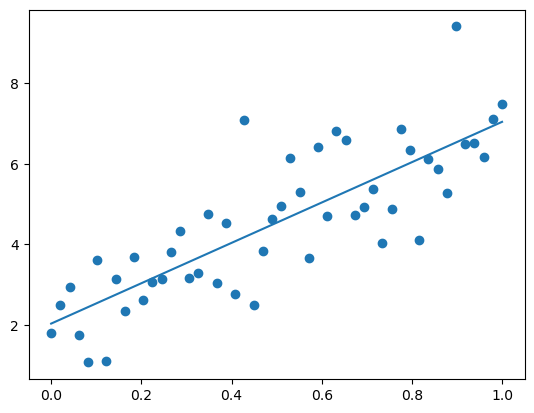

In [48]:
plt.scatter(x, y)
plt.plot(x, (a * x) + b)

### Creating arrays

In [49]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
np.ones((5, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [51]:
np.full((5,5), np.nan)

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [55]:
np.empty(5)  # Warning: Uninitialized memory space

array([ 93.29661395, 174.0339533 , 254.77129266, 335.50863201,
       403.32222222])

In [56]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [57]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
np.logspace(-4, 5, 10)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05])

### Array indexing
* access to elements
* 'slicing'

In [59]:
x = np.arange(0, 10)

# like lists:
x[4]

4

In [60]:
# all elements with indices ≥1 and <4:
x[1:4]

array([1, 2, 3])

In [61]:
# negative indices count from the end
x[-1], x[-2]

(9, 8)

In [62]:
# combination:
x[3:-2]

array([3, 4, 5, 6, 7])

In [63]:
# step size
x[::2]

array([0, 2, 4, 6, 8])

In [64]:
# trick for reversal: negative step
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [65]:
y = np.array([x, x + 10, x + 20, x + 30])
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [66]:
y[2,5]

25

In [67]:
# comma between indices
y[3, 2:-1]

array([32, 33, 34, 35, 36, 37, 38])

In [68]:
# only one index ⇒ one-dimensional array
y[2]

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [69]:
# other axis: (: alone means the whole axis)
y[:, 3]

array([ 3, 13, 23, 33])

In [70]:
# inspecting the number of elements per axis:
y.shape

(4, 10)

### Overwriting array elements

In [71]:
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

In [72]:
y[:, 3] = 0
y

array([[ 0,  1,  2,  0,  4,  5,  6,  7,  8,  9],
       [10, 11, 12,  0, 14, 15, 16, 17, 18, 19],
       [20, 21, 22,  0, 24, 25, 26, 27, 28, 29],
       [30, 31, 32,  0, 34, 35, 36, 37, 38, 39]])

'Slicing' from both sides

In [74]:
y[:,0] = x[3:7]
y

array([[ 3,  1,  2,  0,  4,  5,  6,  7,  8,  9],
       [ 4, 11, 12,  0, 14, 15, 16, 17, 18, 19],
       [ 5, 21, 22,  0, 24, 25, 26, 27, 28, 29],
       [ 6, 31, 32,  0, 34, 35, 36, 37, 38, 39]])

Transposition

In [75]:
y

array([[ 3,  1,  2,  0,  4,  5,  6,  7,  8,  9],
       [ 4, 11, 12,  0, 14, 15, 16, 17, 18, 19],
       [ 5, 21, 22,  0, 24, 25, 26, 27, 28, 29],
       [ 6, 31, 32,  0, 34, 35, 36, 37, 38, 39]])

In [76]:
y.shape

(4, 10)

In [77]:
y.T

array([[ 3,  4,  5,  6],
       [ 1, 11, 21, 31],
       [ 2, 12, 22, 32],
       [ 0,  0,  0,  0],
       [ 4, 14, 24, 34],
       [ 5, 15, 25, 35],
       [ 6, 16, 26, 36],
       [ 7, 17, 27, 37],
       [ 8, 18, 28, 38],
       [ 9, 19, 29, 39]])

In [78]:
y.T.shape

(10, 4)

### Usage of masks

An array filled with Boolean values can be used for accessing selected values in another array.

In [79]:
a = np.linspace(0, 2, 11)
b = np.random.normal(0, 1, 11)
print(a)
print(b)
print(b >= 0)
print(a[b >= 0])

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[-0.52549589  1.15581127  0.01266297  0.69350996  2.41330969 -1.07804334
 -0.53804999 -0.96645263 -2.30176679  0.05253382  1.24868897]
[False  True  True  True  True False False False False  True  True]
[0.2 0.4 0.6 0.8 1.8 2. ]


In [80]:
a[b < 0] = 0
a

array([0. , 0.2, 0.4, 0.6, 0.8, 0. , 0. , 0. , 0. , 1.8, 2. ])

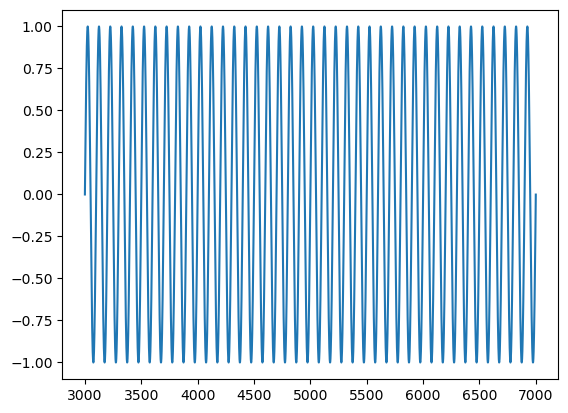

In [81]:
x = np.arange(3000,7000,0.01)
period = 100
y = np.sin(2*np.pi/period * x)

plt.plot(x,y)

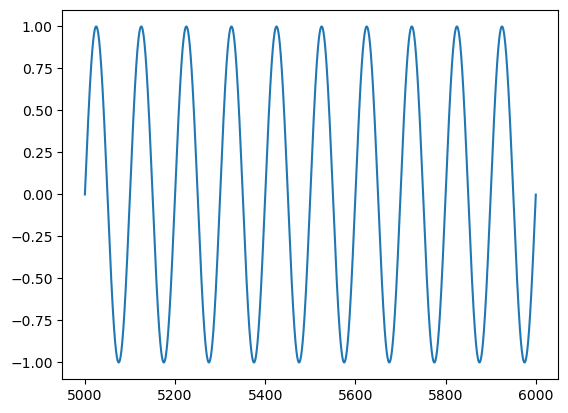

In [82]:
mask= (x > 5000) & (x < 6000)
x_part = x[mask]
y_part = y[mask]
plt.plot(x_part, y_part)

### Random numbers
* many built-in distributions

In [83]:
np.random.uniform(0, 1, 5)

array([0.87109481, 0.98015584, 0.06155038, 0.00306428, 0.55369033])

In [84]:
np.random.normal(5, 10, 5)

array([20.96844529, 16.56699357,  4.29564126,  3.52690037,  9.95441849])

In [85]:
np.random.normal()

0.08457885201306553

### Calculating the value of $\pi$ using Monte Carlo simulation

* We randomly sample numbers from a uniform distribution within a square (-1,1)
* We count the points that fall within a circle of radius 1

The area of the square is:

$$
A_\mathrm{square} = a^2 = 4
$$

The area of the circle is:
$$
A_\mathrm{circle} = \pi r^2 = \pi
$$

So,
$$
\frac{n_\mathrm{circle}}{n_\mathrm{square}} = \frac{A_\mathrm{circle}}{A_\mathrm{square}}
$$
We can estimate the value of $\pi$ as:

$$
\pi = 4 \frac{n_\mathrm{circle}}{n_\mathrm{square}}
$$

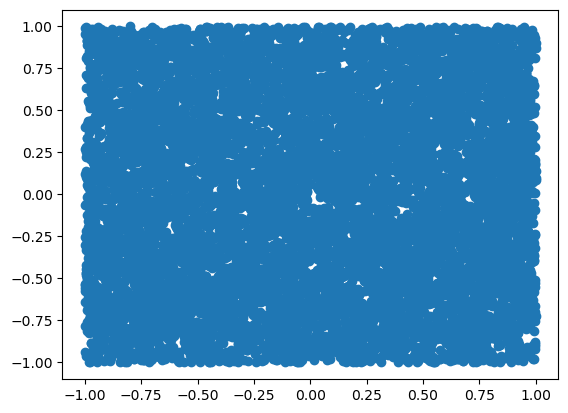

In [2]:
n_square = 10000 # From 1000 to 100000000

x = np.random.uniform(-1, 1, n_square)
y = np.random.uniform(-1, 1, n_square)
plt.scatter(x,y)

In [3]:
radius = np.sqrt(x**2 + y**2)
radius[:10]

array([1.04295672, 1.00852294, 1.20378053, 1.07774678, 0.78241433,
       0.92496582, 0.43030516, 0.2906266 , 0.38891409, 0.81060185])

In [4]:
np.sum(radius <= 1.0)

7814

In [5]:
n_circle = np.sum(radius <= 1.0)

print(4 * n_circle / n_square)

3.1256


## Exercise 2.

1. Generate 100000 samples from a Gaussian distribution with mean $\mu = 2$ and standard deviation $\sigma = 3$.
2. Calculate the mean and standard deviation of the generated sample.
3. What percentage of the samples fall outside the interval $[\mu - \sigma, \mu + \sigma]$?
4. How many samples are greater than zero $> 0$?
5. Determine the standard deviation and mean for the samples ${} > 0$.

In [6]:
y = np.random.normal(2, 3, 10000)

Wizualne sprawdzenie

In [7]:
x = np.linspace(-20,20, 1000)

In [8]:
def gaussian(x, mu, sigma):
    return((1./(sigma*np.sqrt(2*math.pi)))*np.exp(-(x-mu)**2/(2*sigma**2)))

NameError: name 'math' is not defined

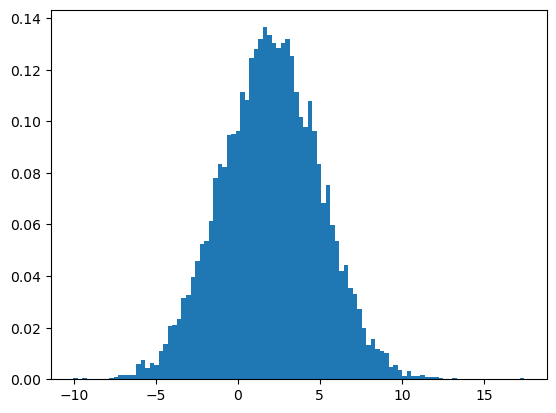

In [9]:
plt.hist(y, bins=100, density=True)
plt.plot(x, gaussian(x,2,3))
plt.axvline(x=2,color='r');
# plt.axvline(x=np.mean(y),color='r');
# print(np.mean(y))

## Task 3.

Error propagation using the Monte Carlo method.

* The Hubble constant measured by PLANCK is given as
$$
H_0 = (67.74 \pm 0.47)\,\frac{\mathrm{km}}{\mathrm{s}\cdot\mathrm{Mpc}}
$$

* Determine the mean and uncertainty of the galaxy velocity estimation, where the measured distance is $(500 \pm 100)\,\mathrm{Mpc}$, using the Monte Carlo method.

$$
v = H_0 * d
$$

In [10]:
no_samples = 10000
H_0s = np.random.normal(67.74,0.47,no_samples)
ds= np.random.normal(500, 100, no_samples)
ds[ds<0.] = 0.

vs = H_0s*ds

v_0 =  33826.88308579564  std(v_0) =  6796.279156143305


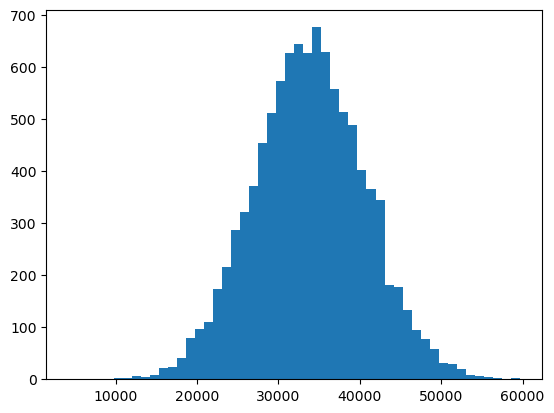

In [11]:
plt.hist(vs, bins=50);
print("v_0 = ", np.mean(vs), " std(v_0) = ", np.std(vs))

### Simple IO

In [12]:
idx = np.arange(100)
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
n = np.random.poisson(20, 100)

In [13]:
idx.shape, x.shape, y.shape, n.shape

((100,), (100,), (100,), (100,))

In [14]:
np.savetxt(
    'data.csv',
    np.column_stack([idx, x, y, n]),
)

In [15]:
!head data.csv

FileNotFoundError: The command was not found or was not executable: /usr/local/bin/bash/.

In [16]:
# Load back the data, unpack=True is needed to read the data columnwise and not row-wise
idx, x, y, n = np.genfromtxt('data.csv', unpack=True)

idx.dtype, x.dtype

(dtype('float64'), dtype('float64'))

### Issues

* Everything is stored as a float
* Larger size than necessary because everything is stored as a float
* Lack of column names

## Numpy recarrays

* Numpy recarrays can have columns of different types
* Access to rows is obtained by index
* Access to columns is obtained by headers

Solution to the problem → Column names, different types

In [17]:
data = np.savetxt(
    'data.csv',
    np.column_stack([idx, x, y, n]),
    delimiter=',', # true csv file
    header=','.join(['idx', 'x', 'y', 'n']),
    fmt=['%d', '%.4g', '%.4g', '%d'],
)

In [ ]:
!head data.csv

In [18]:
data = np.genfromtxt(
    'data.csv',
    names=True, # load column names from first row
    dtype=None, # Automagically determince best data type for each column
    delimiter=',',
)

In [19]:
data[0]

(0, 0.01117, -0.3862, 19)

In [20]:
data['x']

array([ 0.01117,  0.6248 ,  0.212  ,  1.905  , -2.235  , -1.75   ,
       -0.1107 ,  0.8088 ,  0.8545 ,  0.7195 ,  0.1246 ,  0.2636 ,
       -0.4984 , -0.1255 ,  0.5032 ,  0.3657 , -1.007  ,  0.9363 ,
       -1.488  , -1.288  ,  2.037  ,  1.269  ,  1.415  , -0.7044 ,
        0.8814 ,  0.2908 , -1.319  ,  0.1671 , -0.5968 ,  0.1626 ,
       -1.011  , -0.1376 ,  0.2195 ,  1.838  , -0.353  ,  0.488  ,
       -0.7027 , -0.9397 , -1.417  , -0.09444, -2.171  , -0.7107 ,
        0.3828 , -0.01197,  0.6925 , -0.1802 ,  0.3596 , -0.5573 ,
       -0.4213 ,  0.4057 ,  0.413  ,  1.623  , -0.7712 ,  0.5543 ,
       -2.105  , -0.9826 , -0.5847 , -0.1468 ,  0.5053 , -0.6074 ,
        0.159  ,  1.75   , -0.4017 ,  0.3244 , -0.3802 ,  1.025  ,
        0.5119 ,  0.4263 ,  1.037  , -0.7288 , -0.2362 ,  1.856  ,
        0.2632 ,  1.94   , -0.8671 ,  1.199  ,  1.083  , -0.7455 ,
        1.263  ,  0.3335 ,  0.3296 , -1.889  ,  0.9264 ,  0.1129 ,
       -0.4899 ,  2.003  ,  0.05414,  1.233  ,  1.066  ,  0.94

In [21]:
data.dtype

dtype([('idx', '<i8'), ('x', '<f8'), ('y', '<f8'), ('n', '<i8')])

## Linear algebra

Numpy provides access to many linear algebra operations, mainly as a wrapper  [LAPACK](http://www.netlib.org/lapack/)

In [22]:
# symmetrix matrix, use eigh
mat = np.array([
    [4, 2, 0],
    [2, 1, -3],
    [0, -3, 4]
])

eig_vals, eig_vecs = np.linalg.eig(mat)

eig_vals, eig_vecs

(array([-1.40512484,  4.        ,  6.40512484]),
 array([[ 3.07818468e-01,  8.32050294e-01, -4.61454330e-01],
        [-8.31898624e-01, -1.93659252e-16, -5.54927635e-01],
        [-4.61727702e-01,  5.54700196e-01,  6.92181495e-01]]))

In [23]:
np.linalg.inv(mat)

array([[ 0.13888889,  0.22222222,  0.16666667],
       [ 0.22222222, -0.44444444, -0.33333333],
       [ 0.16666667, -0.33333333, -0.        ]])

## Data type - Matrix

In [24]:
mat = np.matrix(mat)

In [25]:
mat.T

matrix([[ 4,  2,  0],
        [ 2,  1, -3],
        [ 0, -3,  4]])

In [26]:
mat * mat

matrix([[ 20,  10,  -6],
        [ 10,  14, -15],
        [ -6, -15,  25]])

In [27]:
mat * 5

matrix([[ 20,  10,   0],
        [ 10,   5, -15],
        [  0, -15,  20]])

In [28]:
mat.I

matrix([[ 0.13888889,  0.22222222,  0.16666667],
        [ 0.22222222, -0.44444444, -0.33333333],
        [ 0.16666667, -0.33333333, -0.        ]])

In [29]:
mat * np.matrix([1, 2, 3]).T

matrix([[ 8],
        [-5],
        [ 6]])

<details>
    <summary><b>Solution of Exercise 1 (click me)</b></summary>

    def linear_regression(x, y):

        cov_matrix = np.cov(x, y)
        a = cov_matrix[0, 1] / cov_matrix[0, 0]
        b = np.mean(y) - a * np.mean(x)

        return a, b
</details>

<details>
    <summary><b>Solution of Exercise 2 (click me)</b></summary>
    
    import numpy as np

    numbers = np.random.normal(2, 3, 10000)

    print('mean:', np.mean(numbers))
    print('std:', np.std(numbers))

    mask = np.logical_or(numbers <= -1, numbers >= 5)

    print('Outside 1 sigma:', len(numbers[mask]) / len(numbers))

    mask = numbers >= 0

    print('n>0:', len(numbers[mask]))
    print('mean, where x > 0:', np.mean(numbers[mask]))
    print('std, where x > 0:', np.std(numbers[mask]))
</details>

<details>
    <summary><b>Solution of Exercise 3 (click me)</b></summary>
    
    import numpy as np

    n = 100000
    h0 = np.random.normal(67.74, 0.47, n)
    distance = np.random.normal(500, 100, n)

    velocity = np.mean(h0 * distance)
    velocity_unc = np.std(h0 * distance)

    print('({:.0f} ± {:.0f}) km/s'.format(velocity, velocity_unc))
</details>